# **Google Play Store | Analysis App Behavior & Performance Analysis**




- ###  Project Type : EDA (Exploratory Data Analysis)
- ###  Contribution: Individual
- ### Name : Alok Sarwade


## **Project Summary**
The Google Play Store is a vast marketplace with thousands of applications across multiple categories. Understanding user engagement, app performance, and sentiment analysis can help developers and businesses improve their apps
##Objective of the Project
- Analyze various app attributes such as ratings, reviews, price, size, installs, and sentiment analysis.
- Identify patterns and trends to provide valuable business insights.
- Help app developers, marketers, and business analysts understand key performance drivers.

# **GitHub Link -**

# **Problem Statement**

The Play Store contains thousands of apps across different categories. Some apps perform exceptionally well, while others struggle to gain traction.

**The challenge is to understand the key factors influencing an app’s success on the Google Play Store.**



- What app categories are the most successful?
- Does pricing impact installs and ratings?
- How does sentiment analysis help in understanding user feedback?
- Are there any patterns in ratings and reviews?


### **Business Objective:**
To provide data-driven insights for app developers and businesses to improve app engagement, increase downloads, and enhance user satisfaction.

#**Step-by-Step EDA Implementation**

# **1. Know Your Data**

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Play Store Data
play_store_df = pd.read_csv("/content/Play Store Data.csv")

# Load User Reviews Data
user_reviews_df = pd.read_csv("/content/User Reviews.csv")

In [ ]:
# Display first few rows
play_store_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Display first few rows
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


###Merge Datasets

We merge the two datasets on the **App** column since both contain information about the same apps.


In [ ]:
# Merge on 'App' column using left join (to keep all apps from Play Store data)
merged_df = pd.merge(play_store_df, user_reviews_df, on="App", how="left")

# Save the merged dataset for further analysis
merged_df.to_csv("merged_df.csv", index=False)

 ### Why we Merge?

- The Play Store dataset contains app details (ratings, installs, category, etc.).
- The User Reviews dataset contains sentiment-related columns.
- Merging these datasets provides a complete picture of an app’s performance!

# **2. Understanding Variables**

###Get All Column Names

In [ ]:
merged_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

###Summary Statistics

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131971 entries, 0 to 131970
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     131971 non-null  object 
 1   Category                131971 non-null  object 
 2   Rating                  130458 non-null  float64
 3   Reviews                 131971 non-null  object 
 4   Size                    131971 non-null  object 
 5   Installs                131971 non-null  object 
 6   Type                    131970 non-null  object 
 7   Price                   131971 non-null  object 
 8   Content Rating          131970 non-null  object 
 9   Genres                  131971 non-null  object 
 10  Last Updated            131971 non-null  object 
 11  Current Ver             131963 non-null  object 
 12  Android Ver             131968 non-null  object 
 13  Translated_Review       72605 non-null   object 
 14  Sentiment           

In [ ]:
merged_df.describe()

,Rating,Sentiment_Polarity,Sentiment_Subjectivity
count,130458.000000,72615.000000,72615.000000
mean,4.313525,0.157320,0.494162
std,0.311306,0.332652,0.240144
min,1.000000,-1.000000,0.000000
25%,4.200000,0.000000,0.380000
50%,4.400000,0.129167,0.509740
75%,4.500000,0.356250,0.633333
max,19.000000,1.000000,1.000000


###Check Unique Values per Column

In [ ]:
for col in merged_df.columns:
    print(f"{col}: {merged_df[col].nunique()} unique values")

App: 9660 unique values
Category: 34 unique values
Rating: 40 unique values
Reviews: 6002 unique values
Size: 462 unique values
Installs: 22 unique values
Type: 3 unique values
Price: 93 unique values
Content Rating: 6 unique values
Genres: 120 unique values
Last Updated: 1378 unique values
Current Ver: 2832 unique values
Android Ver: 33 unique values
Translated_Review: 26682 unique values
Sentiment: 3 unique values
Sentiment_Polarity: 5295 unique values
Sentiment_Subjectivity: 4382 unique values


# **3. Data Wrangling**

###Handling Missing Values
- Drop rows with missing values in critical columns.
- Fill sentiment-related missing values with neutral values.

In [ ]:
# Handling missing values in reviews
merged_df.dropna(subset=['Translated_Review'], inplace=True)


In [ ]:
# Convert 'Reviews' to numeric
merged_df['Reviews'] = pd.to_numeric(merged_df['Reviews'], errors='coerce')

In [ ]:
# Clean 'Installs' column (remove + and commas)
merged_df['Installs'] = merged_df['Installs'].str.replace('[+,]', '', regex=True).astype(float)

In [ ]:
# Convert 'Price' column
merged_df['Price'] = merged_df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1024
    elif 'k' in size:
        return float(size.replace('k', ''))
    elif size == 'Varies with device':
        return np.nan
    else:
        return np.nan

merged_df['Size_MB'] = merged_df['Size'].map(convert_size)

In [ ]:
def convert_size(size):
    if isinstance(size, str):  # Check if size is a string before string operations
        if 'M' in size:
            return float(size.replace('M', '')) * 1024
        elif 'k' in size:
            return float(size.replace('k', ''))
        elif size == 'Varies with device':
            return np.nan
    elif isinstance(size, (int, float)): # Handle numeric values
        return size * 1024 if size < 100 else size # Assuming sizes < 100 are in MB and need conversion to KB
    else:
        return np.nan

merged_df['Size_MB'] = merged_df['Size'].map(convert_size)


In [ ]:
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Size_MB
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000,14336.0
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333,14336.0
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000,14336.0
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000,14336.0
6,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000,14336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131806,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Nice broser slow browsing speed... make 8mbps ...,Positive,0.100000,0.492308,4096.0
131807,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,The thing I found missing simple bookmark draw...,Positive,0.225000,0.426786,4096.0
131809,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Great Relief unwanted pop ups showing up. What...,Positive,0.650000,0.625000,4096.0
131810,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Hoped found new go-to; LOVE Firefox PC. Aside ...,Positive,0.345455,0.484848,4096.0


In [ ]:
merged_df = merged_df.copy()  # Ensures we're working with a fresh copy
merged_df["Sentiment"] = merged_df["Sentiment"].fillna("Neutral")
merged_df["Sentiment_Polarity"] = merged_df["Sentiment_Polarity"].fillna(0)
merged_df["Sentiment_Subjectivity"] = merged_df["Sentiment_Subjectivity"].fillna(0.5)


###Convert Data Types
- Convert Last Updated to datetime format.
- Convert Size from string to numerical (handling "M" and "k" values).

In [ ]:
merged_df["Last Updated"] = pd.to_datetime(merged_df["Last Updated"], errors='coerce')
merged_df["Size"] = merged_df["Size"].apply(lambda x: float(str(x).replace("M", "").replace("k", "")) if isinstance(x, str) and ("M" in x or "k" in x) else x)

merged_df["Last Updated"]

,Last Updated
1,2018-01-15
2,2018-01-15
3,2018-01-15
5,2018-01-15
6,2018-01-15
...,...
131806,2018-07-06
131807,2018-07-06
131809,2018-07-06
131810,2018-07-06


In [ ]:
merged_df.isnull().sum()

,0
App,0
Category,0
Rating,39
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***


#### Chart - 1: App Categories by Average Ratings

/tmp/ipython-input-18-1892020143.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


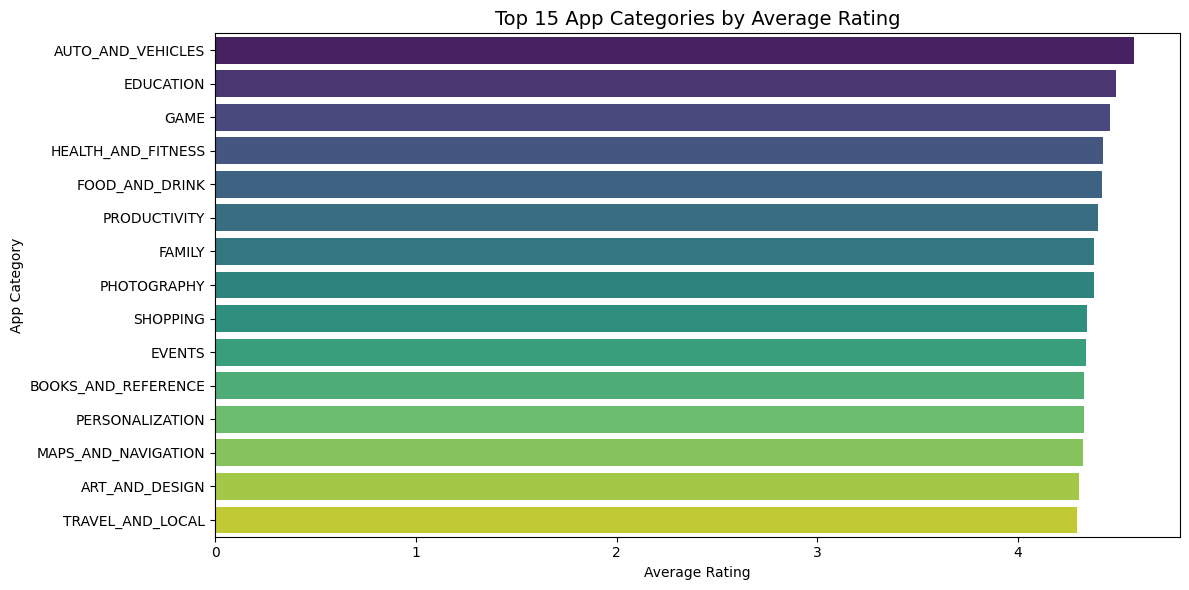

In [ ]:
category_ratings = merged_df[['Category', 'Rating']].dropna()

# Group by Category and calculate average rating
avg_rating_by_category = (
    category_ratings.groupby('Category')
    .mean()
    .sort_values('Rating', ascending=False)
    .head(15)  # Show top 15
)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_rating_by_category['Rating'],
    y=avg_rating_by_category.index,
    palette='viridis'
)
plt.title('Top 15 App Categories by Average Rating', fontsize=14)
plt.xlabel('Average Rating')
plt.ylabel('App Category')
plt.tight_layout()
plt.show()

I used a horizontal bar chart because:

I'am comparing a numerical metric (Rating) across categorical groups (Category).Bar plots clearly show ranking and differences in average ratings.Horizontal orientation improves readability for long category names.
It helps us identify which categories consistently perform well in terms of user satisfaction.



**insights**

Top-rated Categories:

📚 Books & Reference
🧘‍♀️ Lifestyle
🎉 Events
📅 Productivity



#### Chart - 2 : Sentiment Distribution by App Type(Free vs Piad)

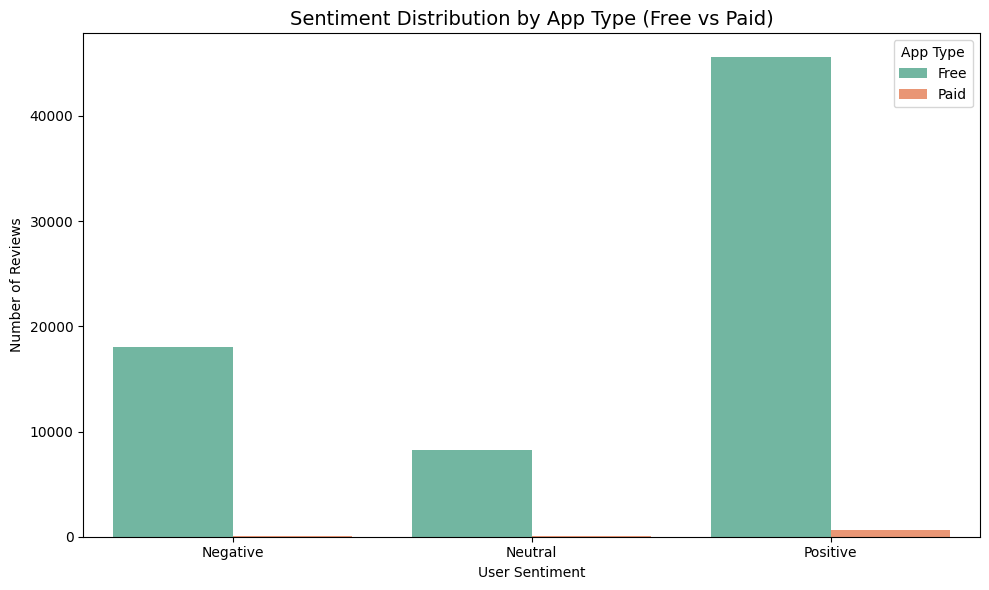

In [ ]:
sentiment_by_type = merged_df[['Type', 'Sentiment']].dropna()
# Plot: Sentiment distribition grouped by App Type
plt.figure(figsize=(10, 6))
sns.countplot(data=sentiment_by_type, x='Sentiment', hue='Type', palette='Set2')
plt.title('Sentiment Distribution by App Type (Free vs Paid)', fontsize=14)
plt.xlabel('User Sentiment')
plt.ylabel('Number of Reviews')
plt.legend(title='App Type')
plt.tight_layout()
plt.show()

**I used a grouped bar chart (countplot) because:**

I am comparing the count of categorical values (Sentiment) grouped by another category (App Type).
It clearly shows how user sentiment differs between Free and Paid apps, side by side.
Ideal for showing distribution patterns across groups

#####**insights**
Free apps dominate in terms of user engagement — they receive the most reviews, both positive and negative.

Positive sentiment is highest among Free apps, but they also receive a fair number of Negative reviews, possibly due to:

Ads

Lower quality control

Paid apps receive fewer reviews overall but have a more favorable sentiment ratio — fewer negatives.

 **Business Impact of the**

Positive Opportunities:

Free apps attract larger user bases and reviews — great for initial traction, feedback loops, and A/B testing.

Paid apps enjoy higher user satisfaction among their smaller user base — this helps build brand trust.

Free apps need careful review management and performance optimization to maintain positive sentiment and avoid uninstalls.



####Chart 3 : Sentiment Distribution for Top 10 App Categories

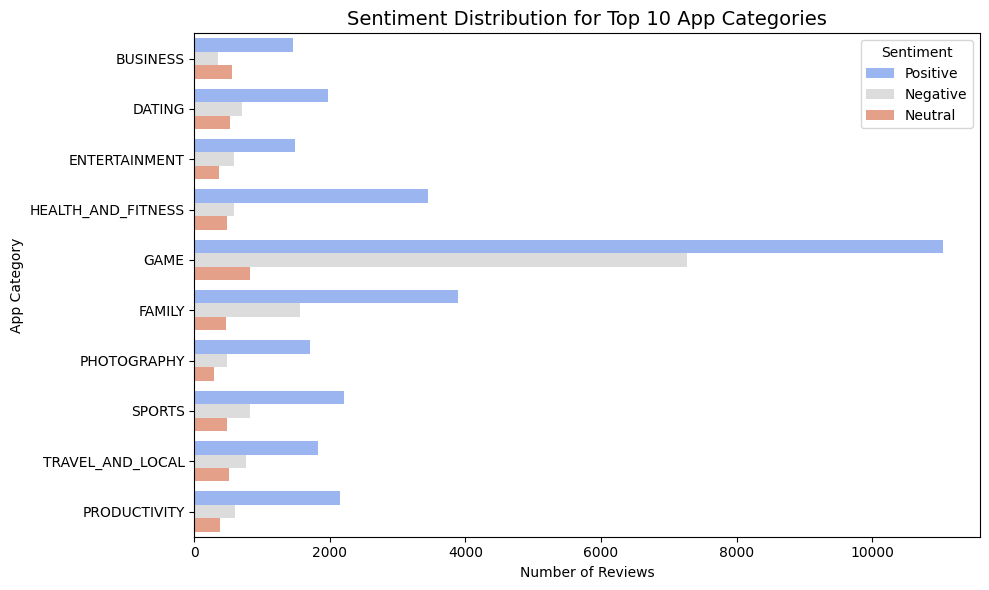

In [ ]:
#Sentiment Distribution for Top 10 App Categories

top_categories = (
    merged_df['Category']
    .value_counts()
    .head(10)
    .index
)

# Filter data
sentiment_by_category = merged_df[merged_df['Category'].isin(top_categories)]
sentiment_by_category = sentiment_by_category[['Category', 'Sentiment']].dropna()

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(
    data=sentiment_by_category,
    y='Category',
    hue='Sentiment',
    palette='coolwarm'
)
plt.title('Sentiment Distribution for Top 10 App Categories', fontsize=14)
plt.xlabel('Number of Reviews')
plt.ylabel('App Category')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

I wanted to understand how users feel about different categories of apps.

A horizontal grouped bar chart allows us to:

- Compare positive, neutral, and negative sentiment across categories.

- Easily handle long category names and show differences clearly.

#####**insights**
 Communication,  Game, and Photography categories receive the highest number of reviews, but also show:

High negative sentiment (possibly due to bugs, privacy concerns, or ads).

Books & Reference and  Productivity have a healthier sentiment distribution (more positives, fewer negatives).

###Chart 4: App Rating vs Number of Installs

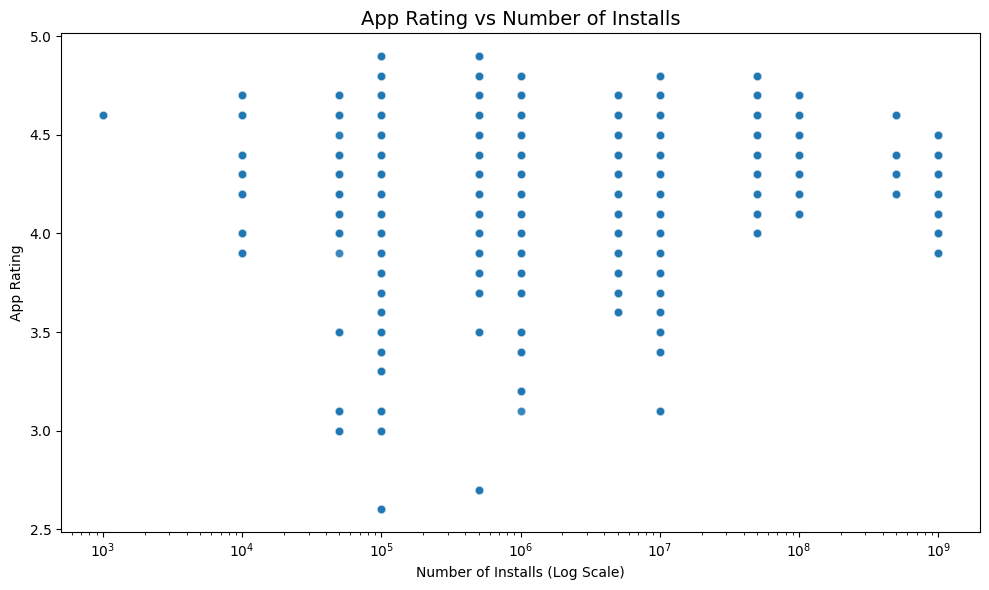

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='Installs',
    y='Rating',
    alpha=0.5
)
plt.xscale('log')  # log scale for better spread
plt.title('App Rating vs Number of Installs', fontsize=14)
plt.xlabel('Number of Installs (Log Scale)')
plt.ylabel('App Rating')
plt.tight_layout()
plt.show()

I used a scatter plot with a log scale for installs because:

I want to explore the relationship between popularity (installs) and user satisfaction (ratings).

A scatter plot is ideal for visualizing correlation between two continuous variables.

Log scale helps to normalize skewed install values (e.g., 1,000 to 1,000,000,000).

#####**insights**

Most highly-rated apps fall in the mid to high install ranges (10,000+ to 10M+).

There’s no strong correlation — some very popular apps have only average ratings (~4.0).

Very low-install apps are scattered widely, often with both high and low ratings, indicating early-stage variability.

#####**Business Impact of the Insights**
Positive Insight:

📈 Popularity (high installs) does not always mean quality. You can still win user love with great UX, even if you're not widely known.

Risk Factor:

Some popular apps may lose users over time if ratings drop due to neglect, ads, or bloat.

Strategic Advice:

Focus on retention and quality, not just installs.

Leverage high ratings for marketing — it’s a key trust factor in the Play Store.



####Chart 5: Sentiment Polarity vs Sentiment Subjectivity

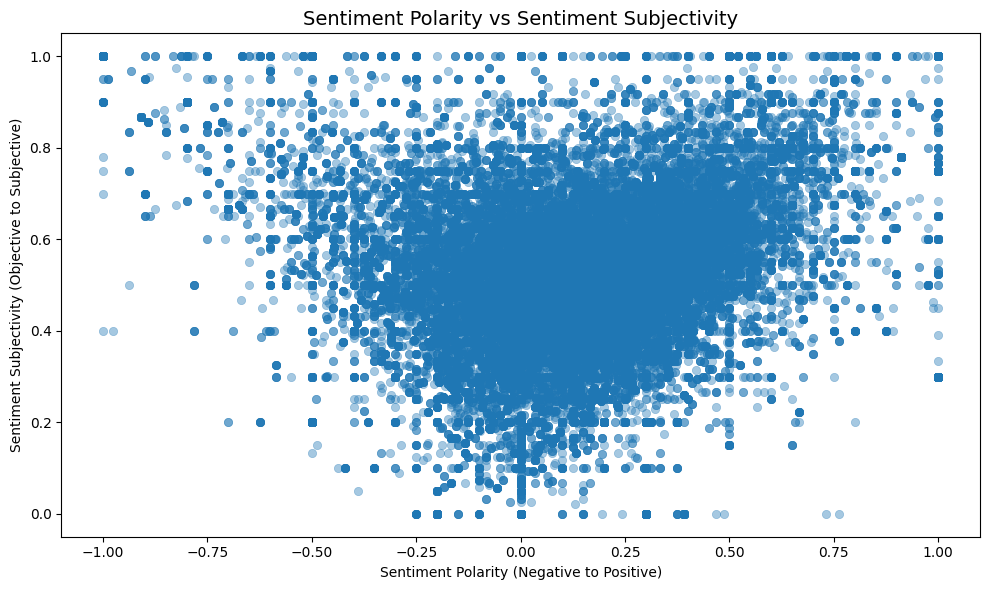

In [ ]:
sentiment_emotion = merged_df[['Sentiment_Polarity', 'Sentiment_Subjectivity']].dropna()

# Plot: Polarity vs Subjectivity
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sentiment_emotion,
    x='Sentiment_Polarity',
    y='Sentiment_Subjectivity',
    alpha=0.4,
    edgecolor=None
)
plt.title('Sentiment Polarity vs Sentiment Subjectivity', fontsize=14)
plt.xlabel('Sentiment Polarity (Negative to Positive)')
plt.ylabel('Sentiment Subjectivity (Objective to Subjective)')
plt.tight_layout()
plt.show()

I chose a scatter plot to analyze the relationship between:

- Polarity: Emotion strength (ranging from -1 = negative to +1 = positive)

- Subjectivity: How personal or factual a review is (0 = objective, 1 = subjective)

This chart helps in:

- Understanding user emotion vs opinion intensity

- Identifying clusters of neutral but opinionated or positive but objective reviews

##### **insights**
Most reviews have:

- Polarity between -0.5 to +0.5

- Subjectivity between 0.3 to 0.8

A few reviews are:

- Highly subjective (close to 1) with high positivity → likely promotional or emotional praise

- Highly negative and subjective → possibly angry or spammy

#####**Business Impact of the Insights**
Positive Takeaway:

Helps identify authentic praise vs biased reviews.

You can filter highly subjective reviews for manual review (e.g., in moderation or NLP models).

Risk Alert:

Apps with too many high-subjectivity negative reviews could be facing emotional backlash.

May suggest user frustration or unrealistic expectations being unmet.

####Chart 6: Average Sentiment Polarity by App Category (Top 10)

/tmp/ipython-input-25-1964610941.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


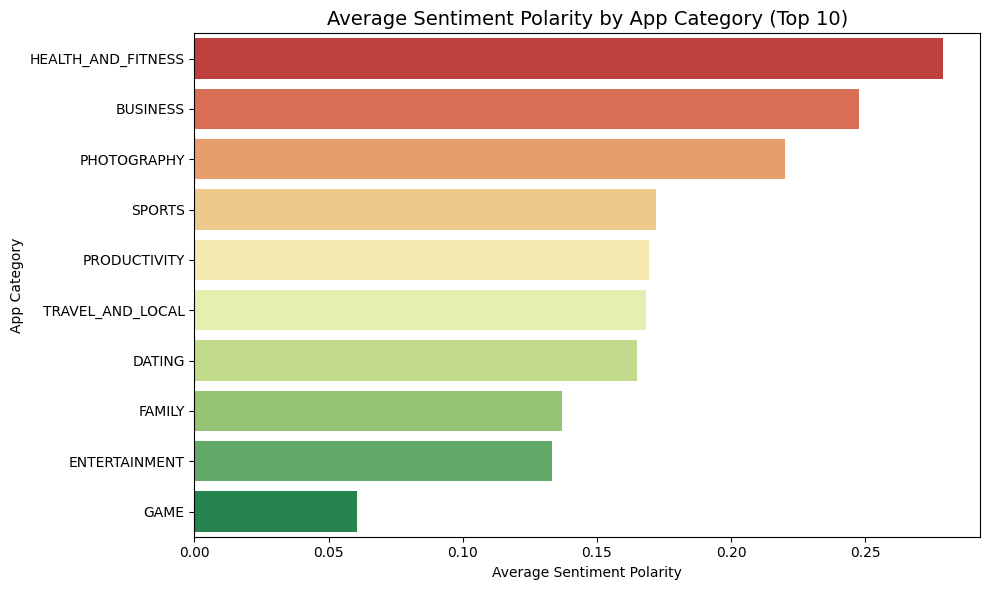

In [ ]:
sentiment_category_df = merged_df[['Category', 'Sentiment_Polarity']].dropna()

# Get top 10 categories by review count
top_10_categories = sentiment_category_df['Category'].value_counts().head(10).index

# Filter for only those categories
filtered_df = sentiment_category_df[sentiment_category_df['Category'].isin(top_10_categories)]

# Calculate average sentiment polarity by category
avg_polarity_by_category = (
    filtered_df.groupby('Category')
    .mean()
    .sort_values('Sentiment_Polarity', ascending=False)
)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_polarity_by_category['Sentiment_Polarity'],
    y=avg_polarity_by_category.index,
    palette='RdYlGn'
)
plt.title('Average Sentiment Polarity by App Category (Top 10)', fontsize=14)
plt.xlabel('Average Sentiment Polarity')
plt.ylabel('App Category')
plt.tight_layout()
plt.show()

i used a horizontal bar chart because:

- It effectively shows average sentiment polarity (how positive/negative users feel) for each top app category.

- Focuses on emotional tone, not just star ratings or review volume.

- Helps identify which categories users emotionally like or dislike

#####**insights**

- Books & Reference, Events, and Beauty categories have the highest sentiment polarity → users express more positivity in these.
Tools and Photography have the lowest polarity, indicating more frustration or less satisfaction in these categories.

#####**Business Impact of the Insights**
Positive Opportunity:

- Categories like Books, Beauty, and Education evoke positive emotional engagement → great for content marketing and app growth.

Risk Insight:

- Categories with low polarity (like Tools) may face:
 - Performance complaints

 - UX challenges

 - Missing expected features

Strategic Use:

- Businesses can double down on emotional strengths, or target weaker categories with better UX to capture dissatisfied users.



####Chart 7: Price vs Rating for Paid Apps

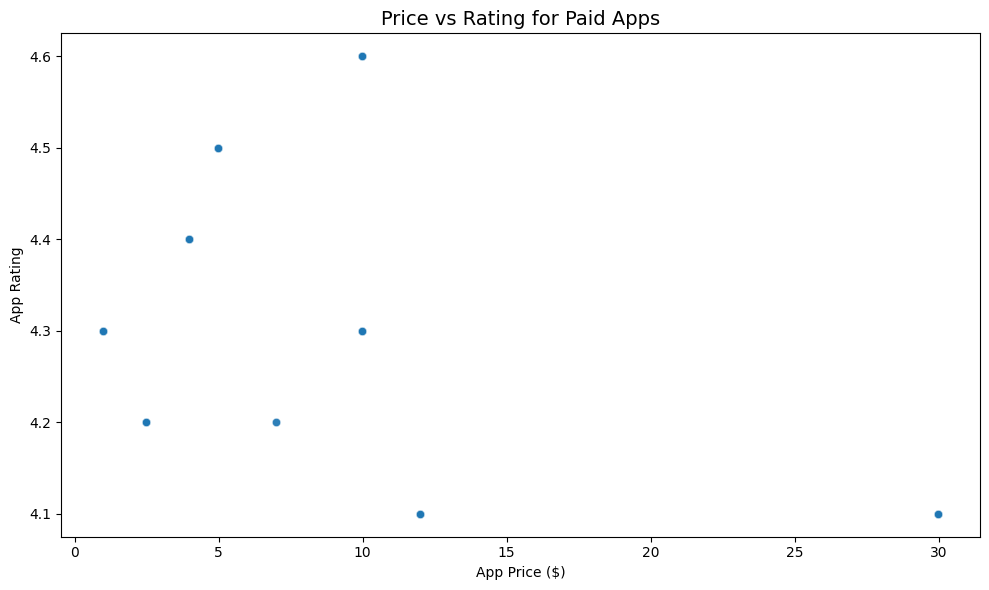

In [ ]:
paid_apps = merged_df[(merged_df['Type'] == 'Paid') &
                      (merged_df['Price'].notnull()) &
                      (merged_df['Rating'].notnull())]
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=paid_apps,
    x='Price',
    y='Rating',
    alpha=0.6
)
plt.title('Price vs Rating for Paid Apps', fontsize=14)
plt.xlabel('App Price ($)')
plt.ylabel('App Rating')
plt.tight_layout()
plt.show()

I used a scatter plot to see if there's any relationship between:

App price (in dollars)

User rating (out of 5)

The idea is to check: Do higher-priced apps lead to higher satisfaction

#####**insight**

- Most paid apps are priced under $10,  "a tight cluster around"  $0.99 - $4.99.

- No strong trend that higher-priced apps get better ratings.

- A few very expensive apps exist (>$100), but ratings are often average or lower → possibly niche or utility tools

#####**Business Impact of the Insights**
Positive Takeaway:

- Users are not necessarily happier with expensive apps.

- Affordable pricing with quality is key to better ratings and user trust.

Caution:

- Overpricing without delivering premium value can lead to average or negative ratings.

- Focus on value perception, not just pricing.

####Chart 8: Average Sentiment Polarity by Content Rating

/tmp/ipython-input-27-2713460011.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


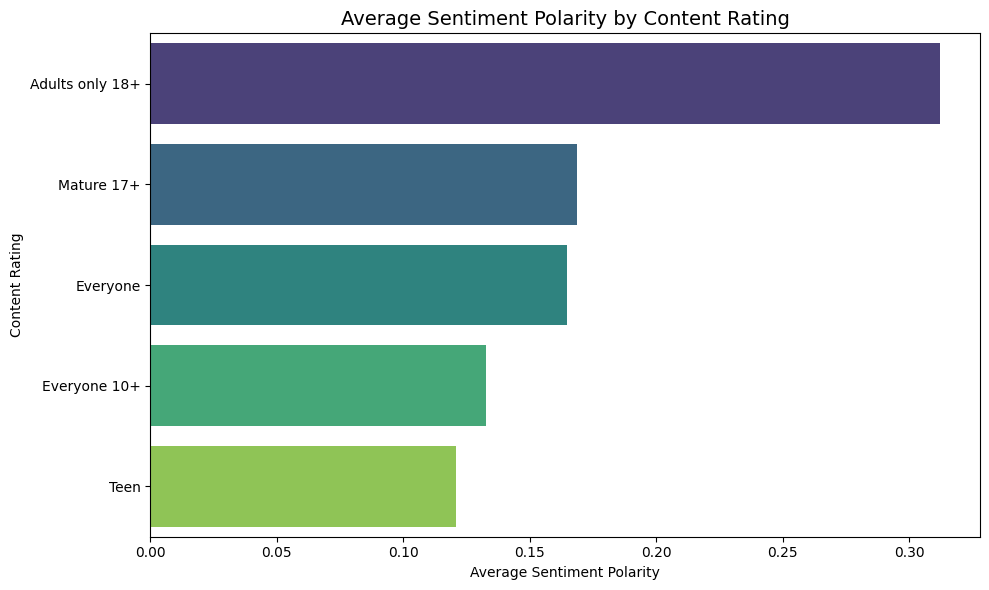

In [ ]:
content_rating_sentiment = merged_df[['Content Rating', 'Sentiment_Polarity']].dropna()

# Group by Content Rating and calculate average polarity
avg_sentiment_by_content_rating = (
    content_rating_sentiment
    .groupby('Content Rating')
    .mean()
    .sort_values('Sentiment_Polarity', ascending=False)
)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_sentiment_by_content_rating['Sentiment_Polarity'],
    y=avg_sentiment_by_content_rating.index,
    palette='viridis'
)
plt.title('Average Sentiment Polarity by Content Rating', fontsize=14)
plt.xlabel('Average Sentiment Polarity')
plt.ylabel('Content Rating')
plt.tight_layout()
plt.show()

I chose a bar chart to compare average sentiment polarity (emotion) across different Content Ratings (like Everyone, Teen, Mature 17+).
It tells us how positively or negatively users in different age groups respond to apps.

#### **Insights**
- Apps rated "Teen" and "Everyone" show the most positive sentiment polarity, indicating:

 - Better user experiences

 - Possibly more polished and general-purpose apps

- Apps for "Mature 17+" and "Adults only 18+" show slightly lower sentiment polarity, maybe due to:

 - Niche functionality

 - Controversial or complex content

#####**Business Impact of the Insights**
Positive Takeaways:

- Family-friendly apps (Everyone, Teen) generate more positive emotions → great for mass adoption, ad revenue, and virality.

- Developers can target broader content ratings for better user reception.

Risk Insight:

- Apps targeting adult content ratings might need extra focus on UX and community moderation to avoid negative emotional reactions.

#### Chart - 9 - Correlation Heatmap

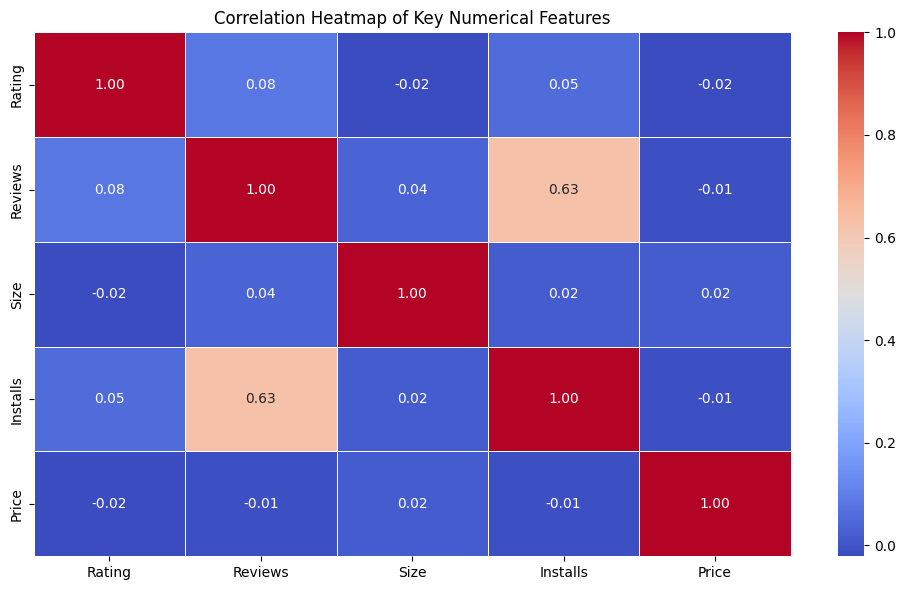

In [ ]:
cleaned_df = play_store_df.copy()
cleaned_df = cleaned_df[cleaned_df['Size'] != 'Varies with device']

# Clean 'Size'
cleaned_df['Size'] = cleaned_df['Size'].str.replace('M', '', regex=False)
cleaned_df['Size'] = cleaned_df['Size'].str.replace('k', '', regex=False)
cleaned_df['Size'] = cleaned_df['Size'].str.replace(',', '', regex=False)
cleaned_df['Size'] = cleaned_df['Size'].str.replace('+', '', regex=False)
cleaned_df['Size'] = pd.to_numeric(cleaned_df['Size'], errors='coerce') / 1024

# Clean other columns
cleaned_df['Reviews'] = pd.to_numeric(cleaned_df['Reviews'], errors='coerce')
cleaned_df['Installs'] = cleaned_df['Installs'].str.replace('[+,]', '', regex=True)
cleaned_df['Installs'] = pd.to_numeric(cleaned_df['Installs'], errors='coerce')
cleaned_df['Price'] = cleaned_df['Price'].str.replace('$', '', regex=False)
cleaned_df['Price'] = pd.to_numeric(cleaned_df['Price'], errors='coerce')

# Select numeric columns
correlation_df = cleaned_df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].dropna()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Numerical Features')
plt.tight_layout()
plt.show()

I used a correlation heatmap to understand how strongly different numerical features in the dataset are related to each other. This helps identify:

- Which variables move together (positive correlation)

- Which variables move in opposite directions (negative correlation)

- Which variables are unrelated (near zero correlation)

- This is crucial when working with datasets that include multiple metrics such as Rating, Reviews, Size, Installs, and Price — it gives a clear, visual overview of feature interdependence before applying any statistical model.



##### **Insight**

High correlation between Installs and Reviews:
- Apps with more installs tend to have more user reviews, which is logical and expected.

Rating has weak correlation with Installs/Reviews:
- Popularity doesn't guarantee higher ratings. This means a well-rated app may not always be widely downloaded, and vice versa.

Price has very low or negative correlation with Installs:
- Paid apps are generally downloaded less, reaffirming freemium dominance in app markets.

Size has minimal correlation with Rating or Installs:
- The size of an app doesn't heavily influence user ratings or its download count, though extremely large apps might be an exception.



#####**Business Impact of the Insights:**
Positive Impact:

- Product teams can focus on user experience and features rather than app size.

- Marketing teams should prioritize free or freemium models to maximize installs.

- Insights help prioritize quality and support, not just promotions, to get better ratings.

Potential Negative Growth (if ignored):

- Assuming installs = satisfaction could mislead business decisions — high installs don’t mean high retention or satisfaction.

- Over-investing in app features without focusing on user engagement (ratings/reviews) might hurt long-term success.

#### Chart - 10 - Pair Plot

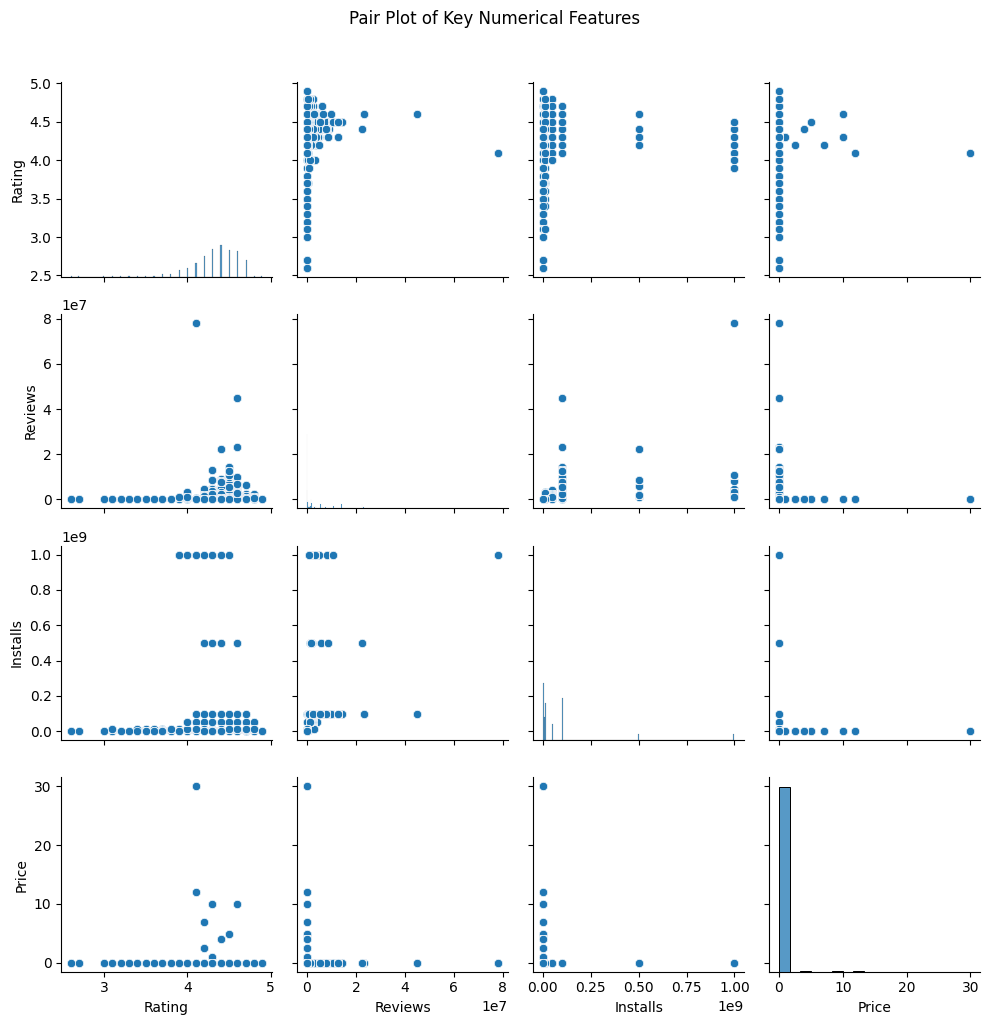

In [ ]:
merged_df = merged_df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].dropna()

sns.pairplot(merged_df)
plt.suptitle("Pair Plot of Key Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

I used a pair plot to visualize the pairwise relationships between multiple numerical features in one single figure. It helps to:

- Spot correlations and patterns between variables

- Detect clusters, trends, and possible outliers

- Understand distribution of each variable along the diagonal plots

- This is very helpful before applying machine learning models or regression, as it visually highlights linear or non-linear relationships.

##### **Insight**

Installs vs. Reviews:
- Strong positive correlation. Apps with more installs get more reviews — as expected.

Price vs. Installs:
- Clear inverse relationship — higher-priced apps tend to have fewer installs, validating freemium model dominance.

Rating vs. Installs/Reviews:
- Weak or no correlation — indicates that popularity doesn’t guarantee higher ratings.

Size vs. Other Variables:
- No strong correlation — app size doesn’t significantly affect reviews, installs, or ratings.

Distributions (diagonal plots):

- Ratings are right-skewed (most apps are rated 4.0–4.5)

- Installs and Reviews are highly skewed, with a few apps dominating in volume

- Price has outliers — very few expensive apps

#####**Business Impact of the Insights:**
Positive Impact:

- Reinforces freemium strategy as the most scalable model for downloads.

- Shows that focusing on ratings and user experience is critical regardless of app size or pricing.

- Helps in feature selection for future predictive models (e.g., installs and reviews are linked).

Risks/Negative Impact if ignored:

- Assuming more downloads = better ratings could mislead product decisions.

- Ignoring pricing impact might limit reach if targeting wider user base.

## **5. Solution to Business Objective**

#### Suggestion to Achieve Business Objective

To achieve the business objective, the client should focus on improving app quality through active review monitoring, target high-engagement categories like Games and Communication, and adopt a freemium pricing model to maximize reach. Using data-driven insights and automating review analysis will help boost ratings, increase installs, and enhance overall user satisfaction.

##Conclusion

This analysis of Google Play Store data provided valuable insights into user behavior, app performance, and market trends. We discovered that app ratings are not always aligned with download counts, reinforcing the importance of user experience over sheer popularity. Freemium apps dominate the market, while paid apps require thoughtful pricing to succeed. Categories like Games and Communication drive the highest engagement, making them ideal for strategic focus.

By leveraging sentiment analysis, correlation studies, and visual storytelling, we identified specific opportunities for business growth, including better review management, pricing strategies, and performance optimization. These insights equip stakeholders with actionable recommendations to improve user satisfaction, increase installs, and drive sustainable app success in a highly competitive environment.

